# Part A - 30 Marks

## DOMAIN:   Automobile
## CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.
## DATA DESCRIPTION: 
### cylinders: multi-valued discrete

### acceleration: continuous

### displacement: continuous

### model year: multi-valued discrete

### horsepower: continuous

### origin: multi-valued discrete

### weight: continuous

### car name: string (unique for each instance)

### mpg: continuous

## PROJECT OBJECTIVE: 
### To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.



## STEPS AND TASK [30 Marks]:


## 1. Data Understanding & Exploration: [5 Marks]


### A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Part1+-+Car+name.csv")

### B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. [1 Mark]

In [3]:
data_attributes = pd.read_json("Part1+-+Car-Attributes.json")

### C. Merge both the DataFrames together to form a single DataFrame [2 Mark]

In [4]:
dataset = pd.concat([data, data_attributes], axis = 1)

### D. Print 5 point summary of the numerical features and share insights. [1 Marks]

In [5]:
dataset.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


#### 50% of all cars have atleast a mileage of 23 mpg, 4 cylinders, travelled ~148(Kilometers?), weigh 2803(pounds?), and are capable of accelerating at a rate of 15.5(miles per sec?)(I preferred 50th percentile data since mean doesn't hold much meaning for a few columns like cyl)

## 2. Data Preparation & Analysis: [10 Marks]


### A. Check and print feature-wise percentage of missing values present in the data and impute with the best      suitable approach. [2 Mark]

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### hp variable should be int, but isn't, looks like something's wrong.
#### I'll convert the column into int, and replace the invalid values with the mean



In [7]:
dataset_copy = dataset.copy()
dataset_copy["hp"] = dataset["hp"].apply(pd.to_numeric, errors= "coerce", downcast = "integer")

In [8]:
#dataset_copy.columns
dataset_copy[dataset_copy["hp"].isna()]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,NaN,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,NaN,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,1


In [9]:
dataset_copy.fillna(dataset_copy["hp"].median(), inplace = True)
dataset_copy["hp"] = dataset_copy["hp"].astype("int")

In [10]:
dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    int32  
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 26.6+ KB


#### Now here, we can see no more null/invalid values

### B. Check for duplicate values in the data and impute with the best suitable approach. [1 Mark]

In [11]:
dataset_copy.drop_duplicates()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


#### There were no duplicates because the resulting dataframe still has 398 rows, the same as original dataframe .

### C. Plot a pairplot for all features. [1 Marks]

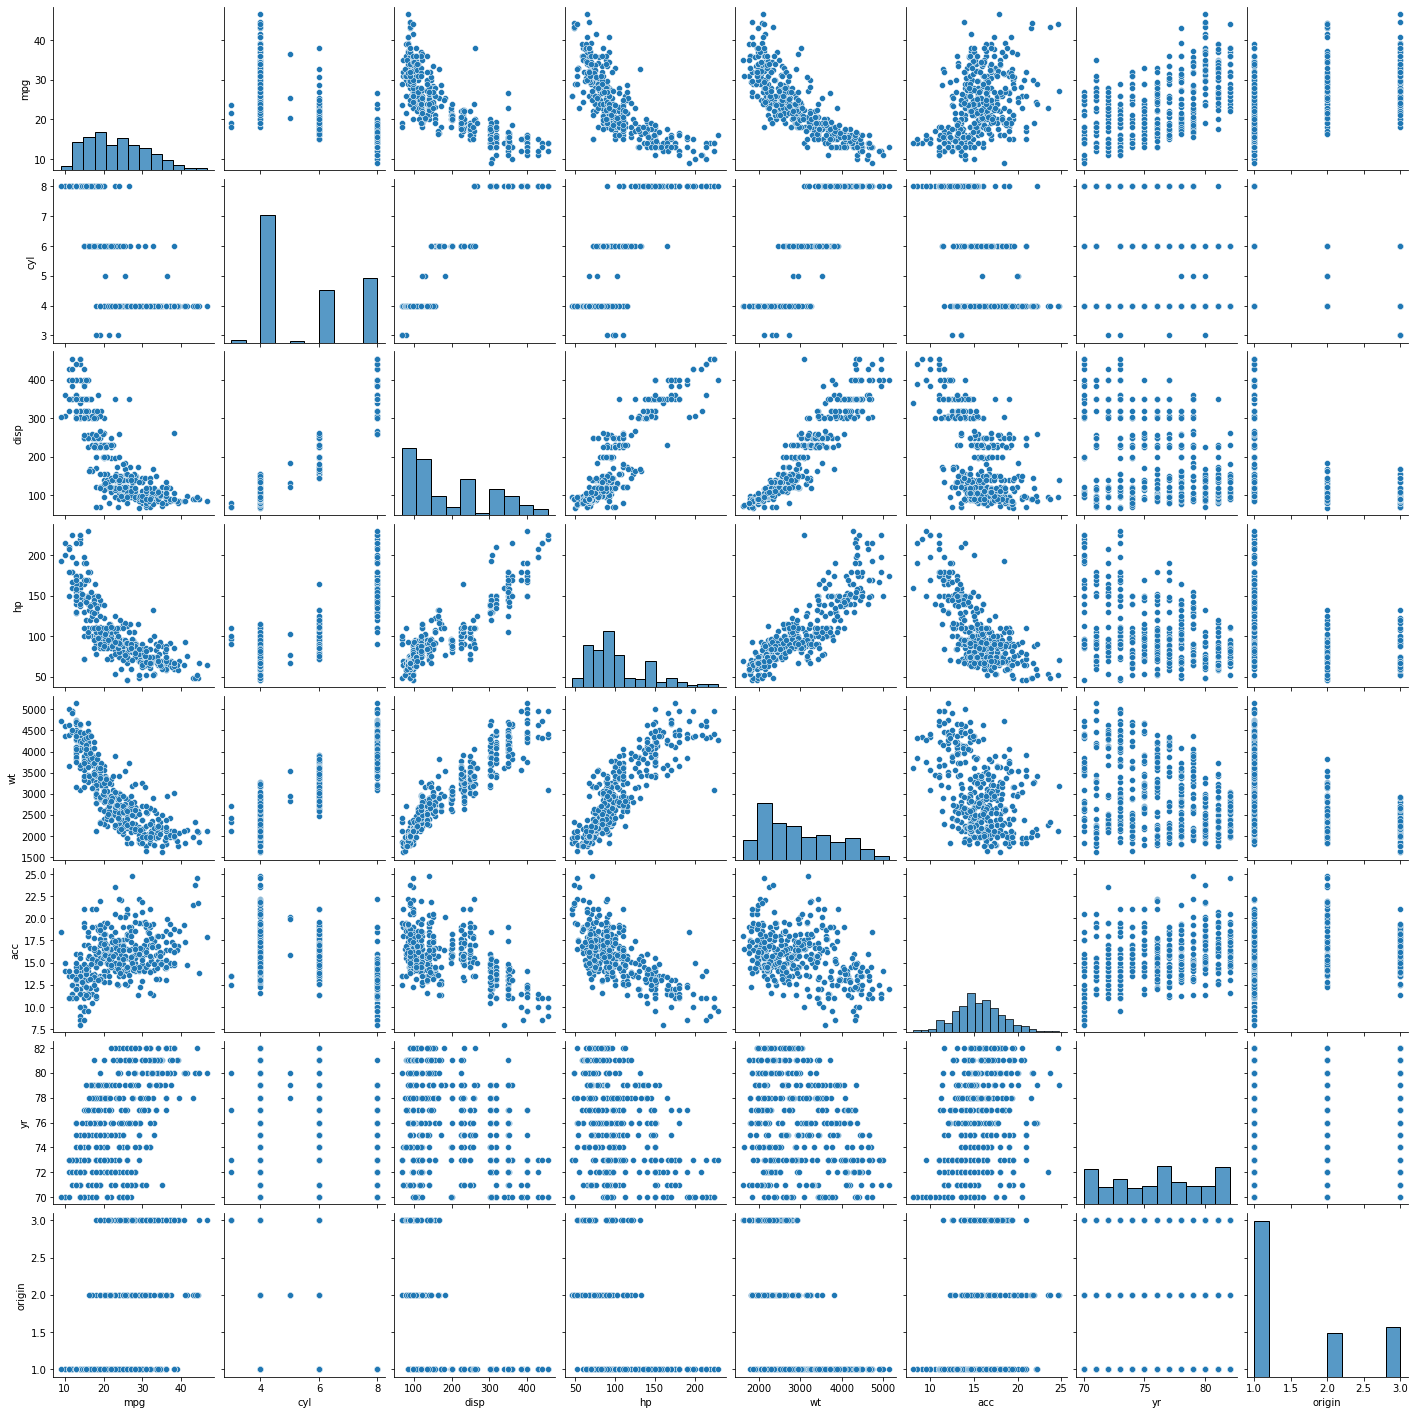

In [12]:
sns.pairplot(dataset_copy)

### D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]

<AxesSubplot:xlabel='wt', ylabel='disp'>

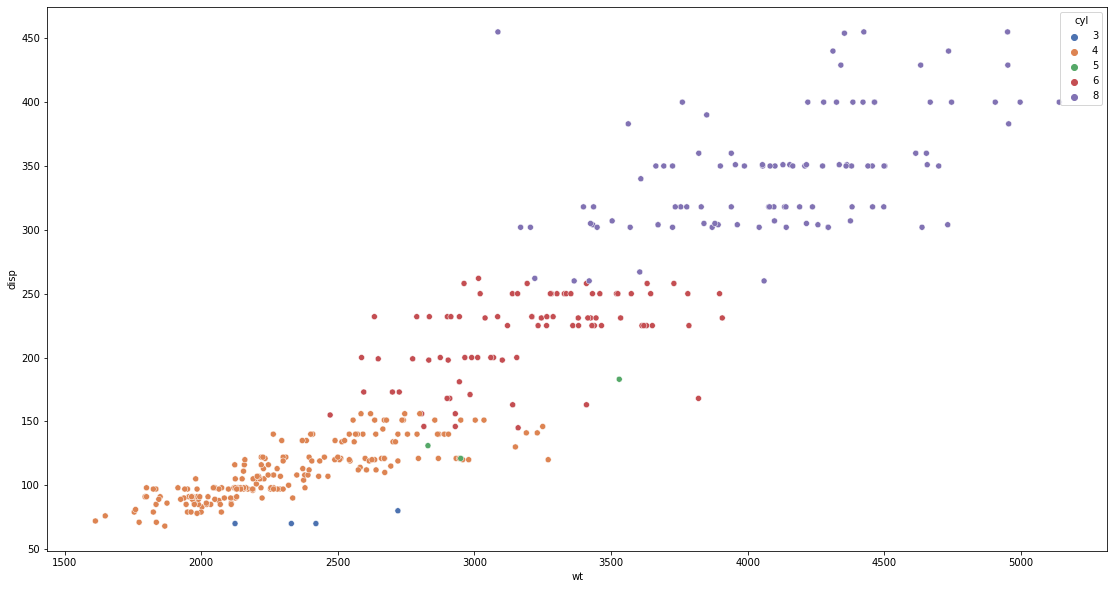

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize = (19, 10))
sns.scatterplot(
    x = dataset_copy["wt"], 
    y = dataset_copy["disp"], 
    hue = dataset_copy["cyl"],
    palette = "deep",
    ax = axes
)

### E. Share insights for Q2.d. [1 Marks]
#### Ans

##### 1.Cars with higher weight seem to have displaced a greater amount of distance 
##### 2.Doubt this means that cars with higher weight can travel more, since it could be possible that people who buy larger cars simply travel longer distances(or more often)(ie, correlation doen't imply causation)


### F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]

<AxesSubplot:xlabel='wt', ylabel='mpg'>

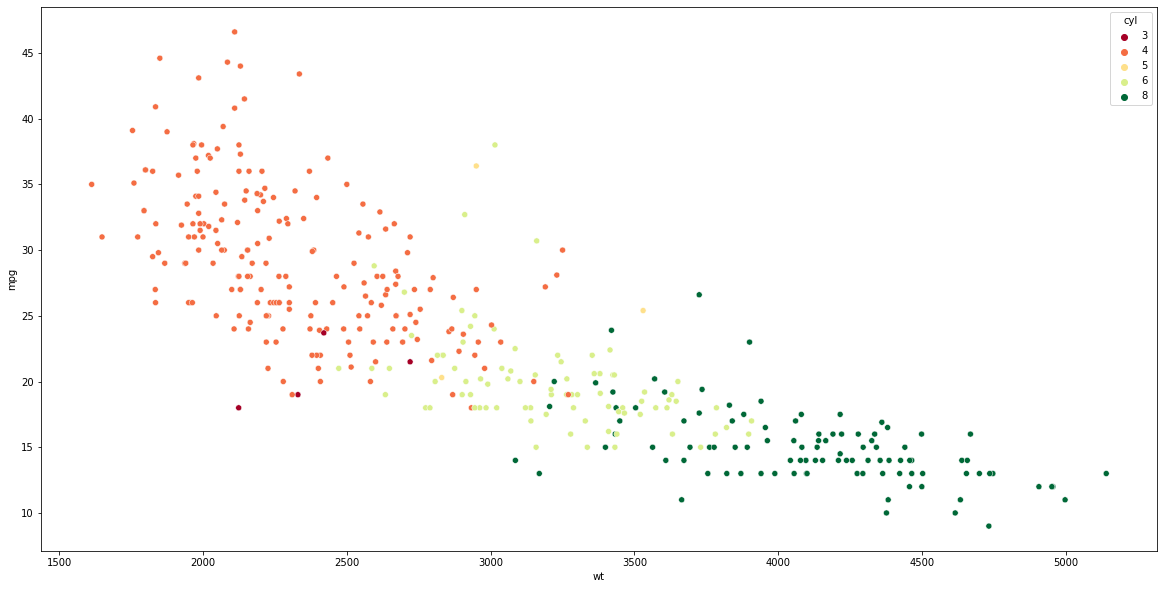

In [14]:
fig, axes = plt.subplots(figsize = (20, 10))

sns.scatterplot(
    x = dataset_copy["wt"],
    y = dataset_copy["mpg"],
    hue = dataset["cyl"],
    palette = "RdYlGn",
    ax = axes,
)

### G. Share insights for Q2.f. [1 Marks]
#### Ans

#### 1.Cars with higher weight seem to have lesser mileage(ie, their mpg value is lower)
#### 2.Once again, although correlation doesn't imply causation, the above insight is plausible since higher weight means more fuel has to be burned to accelerate a car by the same amount comnpared to a lower weight car


### H. Check for unexpected values in all the features and datapoints with such values. [2 Marks]

#### I will simply duplicate the code for doing this for the sake of completeness because it looks like I already solved this while searching for/replacing null values in the dataset


In [15]:
# Create copy of original dataset and convert object datatype to numeric
dataset_copy = dataset.copy()
dataset_copy["hp"] = dataset["hp"].apply(pd.to_numeric, errors= "coerce", downcast = "integer")
#Replace NaNs with median 
dataset_copy.fillna(dataset_copy["hp"].median(), inplace = True)
dataset_copy["hp"] = dataset_copy["hp"].astype("int")

## 3. Clustering: [15 Marks] 

### A. Apply K-Means clustering for 2 to 10 clusters. [3 Marks]


In [16]:
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore


dataset_final = dataset_copy.drop("car_name", axis = 1)


dataset_final = dataset_final.apply(zscore)



num_clusters = range(2, 10)
sum_of_square_error = []

for k in num_clusters:
    model=KMeans(n_clusters = k)
    model.fit(dataset_final)
    sum_of_square_error.append(model.inertia_)

## B. Plot a visual and find elbow point. [2 Marks]

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

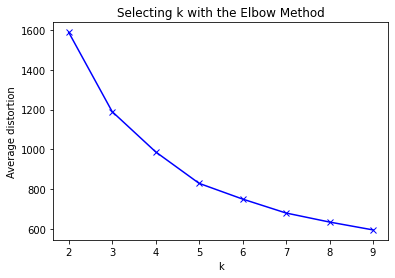

In [17]:
plt.plot(num_clusters, sum_of_square_error , 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### C. On the above visual, highlight which are the possible Elbow points. [1 Marks]

#### Ans 

#### * It seems that 5 or 6 is the optimal number of clusters
#### Will pick 5

### D. Train a K-means clustering model once again on the optimal number of clusters. [3 Marks]

In [18]:
model=KMeans(n_clusters = 5)
model.fit(dataset_final)

KMeans(n_clusters=5)

### E. Add a new feature in the DataFrame which will have labels based upon cluster value. [2 Marks]

In [19]:
dataset_copy_final = dataset_copy.copy()
dataset_copy_final["category"] = model.predict(dataset_final)

In [20]:
dataset_copy_final

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,category
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1,1
...,...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1,3
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1,3
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1,3


### F. Plot a visual and color the datapoints based upon clusters. [2 Marks]

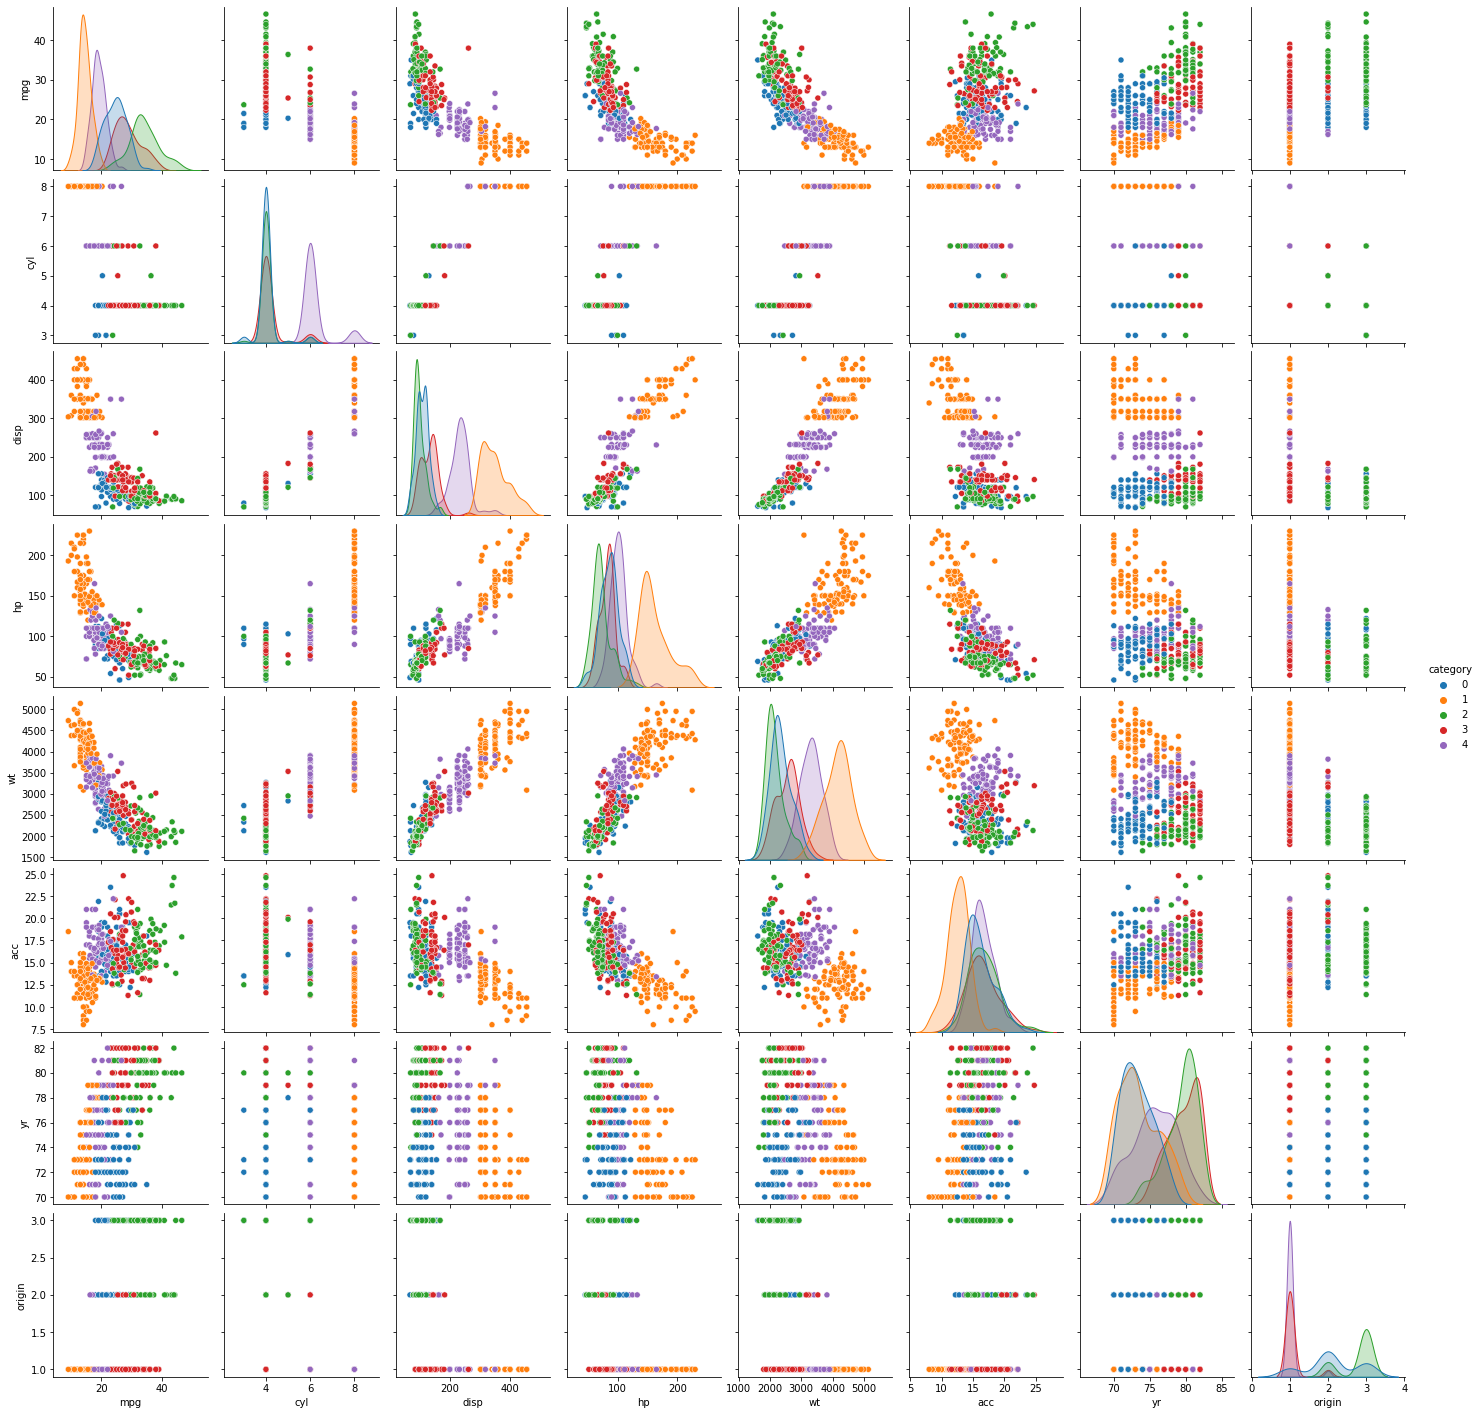

In [21]:
dataset_copy_final["category"] = pd.Categorical(dataset_copy_final["category"])
sns.pairplot(dataset_copy_final, hue = "category")

###  G. Pass a new DataPoint and predict which cluster it belongs to. [2 Marks]

In [22]:
category = model.predict(np.array([1.2, 1, 0.1, -0.8, 1.5, -1, 0.4, -0.7]).reshape(1, -1)) #giving weird numbers since kmeans takes
                                                                                           #zscore preprocessed input in this case
                                                                                           #each number corresponds to each attribute of dataset
                                                                                           #except for car_name
print(category)

[4]


C:\Users\Sam\.ipython\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


# Part B - 30 Marks

## DOMAIN:  Automobile
## CONTEXT:  The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
## DATA DESCRIPTION:  The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles wereused for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicleswas chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult todistinguish between the cars.
### • All the features are numeric i.e. geometric features extracted from the silhouette
## PROJECT OBJECTIVE:  Apply dimensionality reduction technique – PCA and train a model and compare relative results

## • STEPS AND TASK [30 Marks]:

## 1. Data Understanding & Cleaning: [5 Marks]

### A. Read ‘vehicle.csv’ and save as DataFrame. [1 Marks]



In [23]:
dataset_initial = pd.read_csv("vehicle.csv")

### B. Check percentage of missing values and impute with correct approach. [1 Marks]

In [24]:
dataset_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

Few missing values in multiple columns

Since all attributes are numerical, imputing with median(to ensure int attributes remain int )

In [25]:
dataset_ = dataset_initial.fillna(dataset_initial.median())

C:\Users\Sam\AppData\Local\Temp/ipykernel_23424/2199540516.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset_ = dataset_initial.fillna(dataset_initial.median())


In [26]:
dataset_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

### C. Visualize a Pie-chart and print percentage of values for variable ‘class’. [2 Marks]

<AxesSubplot:ylabel='class'>

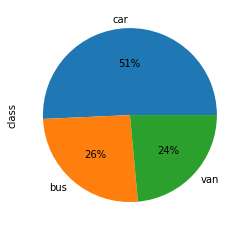

In [27]:
dataset_["class"].value_counts().plot(kind = "pie", autopct = "%1.0f%%")

### D. Check for duplicate rows in the data and impute with correct approach. [1 Marks]

In [28]:
dataset_2 = dataset_.drop_duplicates()

In [29]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

#### Original dataset had 846 rows, so does this

#### Therefore there are no duplicates

## 2. Data Preparation: [2 Marks]

### A. Split data into X and Y. [Train and Test optional] [1 Marks]

In [30]:
#train_data, train_labels, test_data, test_labels = train_test_split(dataset_2)

training_data = dataset_2.drop("class", axis = 1)
testing_data = dataset_2["class"]

train_data, test_data, train_labels, test_labels = train_test_split(training_data, testing_data)

In [31]:
train_data


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
345,101,54.0,106.0,167.0,57.0,7,236.0,28.0,26.0,164,256.0,833.0,253.0,81.0,6.0,14.0,185.0,185
55,94,36.0,66.0,151.0,61.0,8,133.0,50.0,18.0,135,154.0,265.0,119.0,62.0,9.0,3.0,201.0,208
640,91,52.0,98.0,196.0,62.0,9,193.0,34.0,22.0,161,216.0,562.0,244.0,69.0,3.0,1.0,190.0,199
76,91,39.0,83.0,170.0,60.0,8,172.0,38.0,21.0,134,197.0,445.0,152.0,72.0,0.0,10.0,188.0,194
706,82,43.0,70.0,250.0,105.0,55,139.0,48.0,18.0,145,231.0,289.0,172.0,99.0,4.0,9.0,190.0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,92,38.0,71.0,174.0,66.0,7,154.0,43.0,19.0,133,181.0,355.0,130.0,70.0,4.0,24.0,189.0,195
414,85,45.0,82.0,133.0,56.0,11,159.0,43.0,20.0,156,170.0,362.0,173.0,76.0,10.0,21.0,183.0,193
632,86,44.0,70.0,140.0,64.0,6,148.0,45.0,19.0,145,170.0,322.0,185.0,82.0,10.0,1.0,181.0,183
655,86,35.0,44.0,110.0,54.0,2,119.0,57.0,17.0,121,139.0,208.0,137.0,90.0,6.0,1.0,180.0,183


### B. Standardize the Data. [1 Marks]

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

training_scaled = scaler.fit_transform(train_data)
testing_scaled = scaler.fit_transform(test_data)

In [33]:
training_scaled.shape

(634, 18)

In [34]:
testing_scaled.shape

(212, 18)

## 3. Model Building: [13 Marks]



### A. Train a base Classification model using SVM. [1 Marks]

In [35]:
 from sklearn import svm

In [36]:
classifier = svm.SVC()
classifier.fit(training_scaled, train_labels)

SVC()

### B. Print Classification metrics for train data. [1 Marks]

In [37]:
from sklearn.metrics import classification_report

preds = classifier.predict(testing_scaled)
print(classification_report(test_labels, preds))

              precision    recall  f1-score   support

         bus       0.98      0.98      0.98        59
         car       0.96      0.98      0.97        99
         van       0.94      0.91      0.92        54

    accuracy                           0.96       212
   macro avg       0.96      0.96      0.96       212
weighted avg       0.96      0.96      0.96       212



#### This performance is too good to be tuned...

### C. Apply PCA on the data with 10 components. [3 Marks]

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components = 10)
pca.fit(training_scaled)

PCA(n_components=10)

### D. Visualize Cumulative Variance Explained with Number of Components. [2 Marks

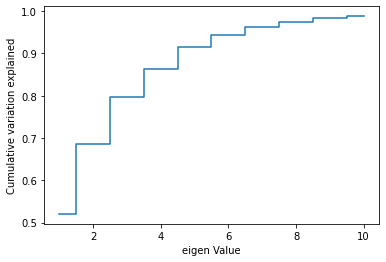

In [40]:
plt.step(list(range(1, 10 + 1)),np.cumsum(pca.explained_variance_ratio_), where = 'mid')
plt.ylabel('Cumulative variation explained')
plt.xlabel('eigen Value')
plt.show()

### E. Draw a horizontal line on the above plot to highlight the threshold of 90%. [1 Marks]

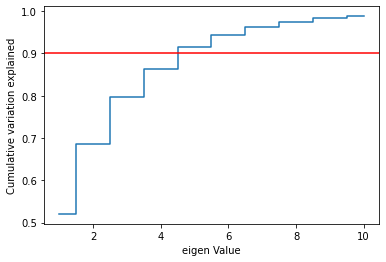

In [41]:
plt.step(list(range(1, 10 + 1)),np.cumsum(pca.explained_variance_ratio_), where = 'mid')
plt.ylabel("Cumulative variation explained")
plt.xlabel("eigen Value")
plt.axhline(y = 0.9, color = "red", linestyle = "-")
plt.show()

### F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained. [2 Marks]

In [42]:
a = np.cumsum(pca.explained_variance_ratio_)
a

array([0.52060509, 0.68497625, 0.79801253, 0.86365956, 0.91512009,
       0.94224349, 0.96164619, 0.9735388 , 0.98247878, 0.98769076])

In [43]:
pca = PCA(n_components = 5)
pca.fit(training_scaled)

training_scaled_pca = pca.transform(training_scaled)
testing_scaled_pca = pca.transform(testing_scaled)

### G. Train SVM model on components selected from above step. [1 Marks]

In [44]:
classifier_pca = svm.SVC()
classifier_pca.fit(training_scaled_pca, train_labels)

SVC()

### H. Print Classification metrics for train data of above model and share insights. [2 Marks]

In [45]:
preds_pca = classifier_pca.predict(testing_scaled_pca)
print(classification_report(test_labels, preds_pca))

              precision    recall  f1-score   support

         bus       0.70      0.64      0.67        59
         car       0.81      0.84      0.83        99
         van       0.68      0.70      0.69        54

    accuracy                           0.75       212
   macro avg       0.73      0.73      0.73       212
weighted avg       0.75      0.75      0.75       212



#### "Tuning" seems to have made things worse!

#### This model, on this dataset, should be left unchanged since the performance is already very good

## 4. Performance Improvement: [5 Marks]


### A. Train another SVM on the components out of PCA. Tune the parameters to improve performance. [2 Marks]

In [46]:
from sklearn.model_selection import GridSearchCV

parameters = classifier_pca.get_params()

In [47]:
parameters

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [48]:
vals = np.geomspace(0+1, 1000, num = 2)
vals = -vals
vals

array([   -1., -1000.])

In [49]:
parameters = {'kernel':('linear', 'rbf'), 'C': [0.01, 1, 100], 
                                                              "gamma" : [0.1, 1, 10, "auto"] }

In [50]:
model_ = svm.SVC()
classifier_tuned = GridSearchCV(model_ , parameters)
classifier_tuned.fit(training_scaled_pca, train_labels)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 1, 100], 'gamma': [0.1, 1, 10, 'auto'],
                         'kernel': ('linear', 'rbf')})

In [51]:
classifier_tuned

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 1, 100], 'gamma': [0.1, 1, 10, 'auto'],
                         'kernel': ('linear', 'rbf')})

### B. Share best Parameters observed from above step. [1 Marks]

In [52]:
classifier_tuned.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(),
 'n_jobs': None,
 'param_grid': {'kernel': ('linear', 'rbf'),
  'C': [0.01, 1, 100],
  'gamma': [0.1, 1, 10, 'auto']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [53]:
preds_pca_tuned = classifier_tuned.predict(testing_scaled_pca)

### C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along withinsights. [2 Marks]

In [54]:
print(classification_report(test_labels, preds_pca_tuned))

              precision    recall  f1-score   support

         bus       0.80      0.75      0.77        59
         car       0.86      0.87      0.86        99
         van       0.72      0.76      0.74        54

    accuracy                           0.81       212
   macro avg       0.79      0.79      0.79       212
weighted avg       0.81      0.81      0.81       212



There doesn't seem to be any difference between the two, ie, their hyperparameters appear to be the same(that's why I pasted the original model's parameters as well), yet the original model is somehow performing better...

This dataset appears to be a very bad example in which to use PCA

## 5. Data Understanding & Cleaning: [5 Marks]

### A. Explain pre-requisite/assumptions of PCA. [2 Marks]

### B. Explain advantages and limitations of PCA. [3 Marks]